<a href="https://colab.research.google.com/github/JuanLiev/Analisis-de-datos-1/blob/main/Taller_Univariado_Analisis_de_datos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS DE USO DE INTELIGENCIA ARTIFICIAL EN ESTUDIANTES Y PREVENCIÓN DE ABANDONO ACADÉMICO (TALLER DE ANALISIS UNIVARIADO)

**1. ANÁLISIS EXPLORATORIO DE DATOS**
---

Estructura del Dataset (tomado de kagle).

In [ ]:
# Importar la librería pandas con el alias pd
import pandas as pd

# Leer el conjunto de datos por medio de la URL proporcionada y asignarlo a la variable "df"

df = pd.read_csv("/content/ai_assistant_usage_student_life.csv")

# Crear la lista de nombres para el encabezado
headers = ["SessionID","StudentLevel","Discipline","SessionDate","SessionLengthMin","TotalPrompts","TaskType","AI_AssistanceLevel", "FinalOutcome", "UsedAgain", "SatisfactionRating"]


df.columns = headers
df

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9
...,...,...,...,...,...,...,...,...,...,...,...
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,Studying,3,Assignment Completed,True,4.2
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,Writing,5,Assignment Completed,True,5.0
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,Studying,3,Idea Drafted,True,3.5
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,Writing,3,Assignment Completed,False,4.3


In [ ]:
# Hay duplicidad?
print("=== Hay duplicidad?===")
df_duplicado = df.duplicated().sum()
print(df_duplicado)
print()

#Hay valores nulos?
print("=== Hay valores nulos? ===")
df_nulos = df.isnull().sum()
print(df_nulos)
print()

#Periodo de la sesiones
print("=== Periodo de la sesiones ===")
periodo = df['SessionDate'].min(), df['SessionDate'].max()
print(periodo)
print()

=== Hay duplicidad?===
0

=== Hay valores nulos? ===
SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

=== Periodo de la sesiones ===
('2024-06-24', '2025-06-24')



El conjunto de datos analizado comprende 10,000 registros con 11 variables diferentes, el dataset no presenta valores faltantes ni repetidos, cubriendo un período de datos desde 2024 hasta 2025, para el ejercicio se trabaja bajo el supuesto que hacemos parte del ministerio de educación o alguna entidad gubernamental relacionada con la educación.


In [ ]:
# Distribución por Nivel Estudiantil
print("=== DISTRIBUCIÓN POR NIVEL DICIPLINA ===")
nivel_dist = df['Discipline'].value_counts(normalize=True) * 100
print(nivel_dist.round(2))
print()

# Distribución por Nivel Estudiantil
print("=== DISTRIBUCIÓN POR NIVEL ESTUDIANTIL ===")
nivel_dist = df['StudentLevel'].value_counts(normalize=True) * 100
print(nivel_dist.round(2))
print()

# Distribución por Tipos de Tarea Académica
print("=== DISTRIBUCIÓN POR TIPOS DE TAREA ACADÉMICA ===")
tarea_dist = df['TaskType'].value_counts(normalize=True) * 100
print(tarea_dist.round(2))
print()

# Patrones de Retención
print("=== PATRONES DE RETENCIÓN ===")
retencion_dist = df['UsedAgain'].value_counts(normalize=True) * 100
print(retencion_dist.round(2))

=== DISTRIBUCIÓN POR NIVEL DICIPLINA ===
Discipline
Biology             14.58
Computer Science    14.45
Engineering         14.30
Math                14.22
Psychology          14.18
History             14.17
Business            14.10
Name: proportion, dtype: float64

=== DISTRIBUCIÓN POR NIVEL ESTUDIANTIL ===
StudentLevel
Undergraduate    59.78
High School      20.27
Graduate         19.95
Name: proportion, dtype: float64

=== DISTRIBUCIÓN POR TIPOS DE TAREA ACADÉMICA ===
TaskType
Writing          31.01
Studying         20.40
Homework Help    19.59
Coding           19.48
Brainstorming     4.76
Research          4.76
Name: proportion, dtype: float64

=== PATRONES DE RETENCIÓN ===
UsedAgain
True     70.64
False    29.36
Name: proportion, dtype: float64


**Variables Categóricas Clave**

**Distribución por Disciplina**

* Biology: aproximadamente 14,58% (la mayoría)

* Computer Science: aproximadamente 14,45%

* Engineering: aproximadamente 14,30%

* Math: aproximadamente 14,22%

* Psychology: aproximadamente 14,18%

* History: aproximadamente 14,17%

* Business: aproximadamente 14,10%

---

**Distribución por Nivel Estudiantil**

* Undergraduate: aproximadamente 59,78% (la mayoría)

* High School: aproximadamente 20,27%

* Graduate: aproximadamente 19,95%

---

**Distribución por Tipos de Tarea Académica**

* Writing: aproximadamente 31,01% (actividad más común)

* Studying: aproximadamente 20,40%

* Coding: aproximadamente 19,48%

* Homework Help: aproximadamente 19,59%

* Research: aproximadamente 4,76%

* Brainstorming: aproximadamente 4,76%

---
**Patrones de Retención (UsedAgain)**

* 70.64% de estudiantes regresan a utilizar la IA

* 29.36% no regresan después de la primera experiencia



In [ ]:
# Promedios de Variables Numéricas
print("=== PROMEDIOS DE VARIABLES NUMÉRICAS ===")
print(f"Duración de Sesión: {df['SessionLengthMin'].mean():.2f} minutos")
print(f"Total de Prompts: {df['TotalPrompts'].mean():.2f}")
print(f"Nivel de Asistencia IA: {df['AI_AssistanceLevel'].mean():.2f}")
print(f"Satisfacción: {df['SatisfactionRating'].mean():.2f}")

=== PROMEDIOS DE VARIABLES NUMÉRICAS ===
Duración de Sesión: 19.85 minutos
Total de Prompts: 5.61
Nivel de Asistencia IA: 3.48
Satisfacción: 3.42



**Variables Numéricas**

Duración de Sesión: Promedio aproximado de 20 minutos por sesión

Total de Prompts: Promedio aproximado de 6 prompts por sesión

Nivel de Asistencia IA: Promedio aproximado de 3.5 en escala de 5 puntos

Satisfacción: Promedio aproximado de 3.4 en escala de 5 puntos





**2.DESCRIPCIÓN DEL PROBLEMA**
---

**Problemática Central**

Los estudiantes desarrollan dependencia de IA según el tipo de tarea, creando vulnerabilidades académicas específicas que amenazan competencias fundamentales de manera diferenciada entre actividades de escritura, investigación, programación y estudio.

---
**Problemáticas Específicas Identificadas**

a.	Dependencia Académica Excesiva

Los estudiantes están desarrollando una dependencia preocupante de asistentes de IA, resultando en la pérdida de habilidades fundamentales como:

* Pensamiento crítico y análisis independiente

* Capacidad de investigación autónoma

* Habilidades de escritura original

* Resolución de problemas sin asistencia tecnológica

---
b.	Crisis de Evaluación Académica por Actividad

El sistema de evaluación tradicional no puede distinguir efectivamente entre trabajo original y asistido por IA, especialmente en:

* Tareas de escritura (ensayos, reportes, análisis)
* Resolución de problemas complejos
* Actividades de investigación y síntesis

---
c.	Desarrollo Profesional Desbalanceado
Los estudiantes desarrollan competencias desbalanceadas donde ciertas habilidades se hipertrofian (uso tecnológico) mientras otras se atrofian (pensamiento independiente), creando perfiles profesionales incompletos según su área de especialización.

Áreas Críticas Afectadas

Instituciones Educativas: Enfrentan obsolescencia de métodos de evaluación y necesidad urgente de rediseño curricular diferenciado por tipo de actividad académica.

Estudiantes en Formacion: Su desarrollo profesional se encuentra desbalanceado, con fortalezas tecnológicas pero déficits críticos en competencias fundamentales específicas de su campo.

Mercado Laboral: Recibe graduados con habilidades incompletas, deficientes en pensamiento crítico, creatividad original y resolución autónoma según el tipo de trabajo profesional.

Docentes: Experimentan dificultades para evaluar efectivamente el aprendizaje real versus el asistido por IA.


3.JUSTIFICACIÓN DEL USO DE CIENCIA DE DATOS E INTELIGENCIA ARTIFICIAL
---
**Necesidad de Evidencia Empírica**

La dependencia académica diferenciada por tipo de tarea es un fenómeno que requiere análisis específico para identificar patrones de vulnerabilidad. Los métodos tradicionales de evaluación no pueden detectar niveles de dependencia entre actividades de escritura, investigación, programación y estudio, perdiendo oportunidades para intervenciones tempranas. Se requieren indicadores predictivos por categoría que permitan identificar qué actividades generan mayor riesgo de pérdida de competencias fundamentales.

**Contribuciones de los Datos y Técnicas de IA**

Identificación de patrones de uso saludable: Determinar qué tipos de interacción con IA realmente benefician el proceso de aprendizaje.

Detección temprana de dependencia: Identificar estudiantes en riesgo de desarrollar dependencia académica antes de que se manifiesten problemas de rendimiento.

Personalización educativa: Adaptar el uso de IA según el perfil específico y las necesidades individuales de cada estudiante.

Sistema de puntaje predictivo: Desarrollar un "Índice de Riesgo de Abandono" basado en comportamiento tecnológico observable.

---

**Modelos y Enfoques Metodológicos**

Modelos Predictivos

* Análisis de Dependencia por Actividad: Predicción de niveles de dependencia específicos para Writing, Research, Coding, Study, etc.

*	Modelos de Riesgo Diferenciado: Identificación de estudiantes en riesgo de pérdida de competencias según tipo de tarea

*	Regresión Logística Multinomial: Cálculo de probabilidad de sobre-dependencia por categoría de actividad académica

*	Random Forest Estratificado: Identificación de variables más predictivas de riesgo específico por tipo de tarea

*	Gradient Boosting: Modelos ensemble que consideran interacciones entre diferentes tipos de actividades académicas

Análisis Descriptivo

* Segmentación por Tipo de Tarea: Identificación de patrones diferenciados de uso, satisfacción y efectividad según actividad académica

* Matriz de Vulnerabilidad: Mapeo de niveles de riesgo específicos por combinación estudiante-tipo de tarea

* Análisis Temporal por Actividad: Evolución de dependencia diferenciada a lo largo del tiempo académico

* Clustering de Perfiles de Uso: Agrupación de estudiantes según patrones similares de dependencia por tipo de actividad

4.FORMULACIÓN DE PREGUNTA SMART
--

**¿Cuáles tipos de tareas académicas generan patrones de dependencia tecnológica más riesgosos, y cómo podemos implementar un sistema de monitoreo diferenciado por actividad que identifique y mitigue la sobre-dependencia en el 90% de estudiantes vulnerables durante los próximos 24 meses en nuestra red de 2,500 instituciones educativas?**

5.DESCRIPCION DE LA IMPORTANCIA DE LA COLUMNA TaskType
--

La variable TaskType constituye un indicador estratégico dentro de nuestro conjunto de datos, ya que nos permite identificar la naturaleza específica de la actividad académica y su nivel de vulnerabilidad asociado al desarrollo de dependencia tecnológica. Esta variable categórica se convierte en un clasificador de riesgo que puede revelar patrones de sobre-dependencia específicos según el tipo de tarea, permitiendo intervenciones precisas por actividad académica.

Su importancia radica en que captura la variedad del impacto de IA en diferentes competencias académicas fundamentales. Cada tipo de tarea representa un dominio de habilidades que puede verse comprometido de manera diferenciada:

* Writing: Riesgo de pérdida de expresión original y construcción argumental autónoma

* Research: Vulnerabilidad en habilidades de búsqueda, análisis crítico y síntesis independiente

* Coding: Peligro de automatización sin comprensión de lógica algorítmica subyacente

* Homework Help: Erosión del proceso de aprendizaje autónomo y resolución independiente

* Study: Sustitución de memorización y comprensión profunda por respuestas inmediatas

* Brainstorming: Reducción de creatividad original y pensamiento divergente

Para efectos de toma de decisiones, esta variable nos permitirá:

* Segmentar intervenciones por tipo de actividad académica
* Identificar actividades de mayor riesgo para desarrollo de competencias específicas
* Desarrollar políticas diferenciadas de uso de IA según naturaleza de la tarea
* Implementar sistemas de alerta temprana específicos por categoría de actividad
* Diseñar estrategias pedagógicas adaptadas a vulnerabilidades particulares de cada tipo de tarea

6.ANALISIS UNIVARIADO DE LA VARIABLE OBJETIVO TaskType
--

La columna **TaskType**	valida la naturaleza de la tarea

* Writing        
* Studying
* Homework Help
* Coding
* Brainstorming
* Research

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

rcParams['figure.figsize'] = (12,  6)

# Convertir la columna TaskType a formato numérico para usar como target
le = LabelEncoder()
df['tarea'] = le.fit_transform(df['TaskType'])

# Mostrar las primeras filas del DataFrame para verificar
display(df.head())

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,tarea
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,4
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,4
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,1
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,1
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,5


In [ ]:
df.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating,TaskType_Encoded
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780,3.095900
std,13.897302,4.648764,0.991805,1.143331,1.684929
min,0.030000,1.000000,1.000000,1.000000,0.000000
25%,9.630000,2.000000,3.000000,2.600000,2.000000
50%,16.650000,4.000000,4.000000,3.500000,4.000000
75%,26.670000,8.000000,4.000000,4.400000,5.000000
max,110.810000,39.000000,5.000000,5.000000,5.000000


In [ ]:
# verificar valores unicos
df.tarea.value_counts()

,count
tarea,
5,3101
4,2040
2,1959
1,1948
0,476
3,476


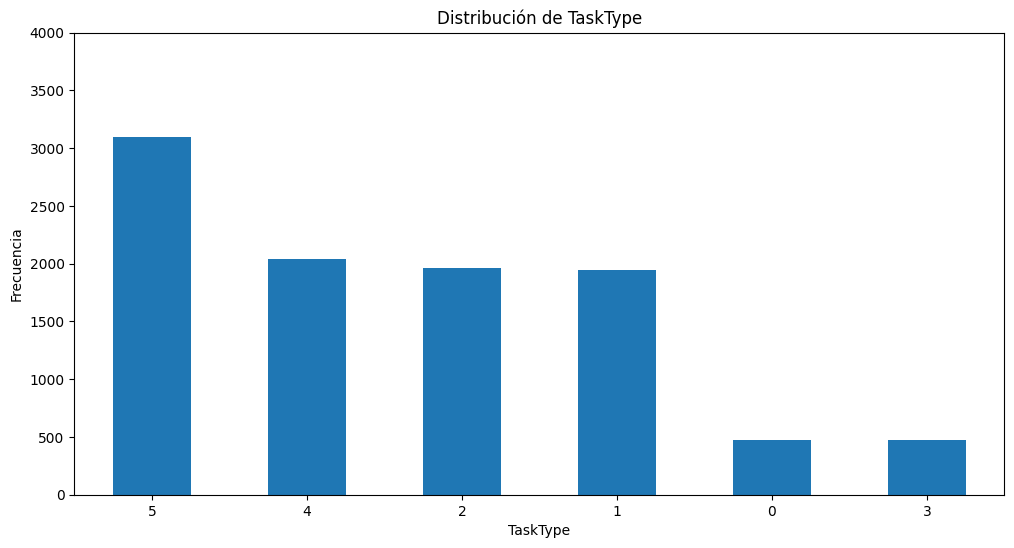

In [ ]:
import matplotlib.pyplot as plt
# Distribucion de TaskType
df.tarea.value_counts().plot(kind='bar')
plt.title('Distribución de TaskType')
plt.xlabel('TaskType')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.ylim(0, 4000)
plt.show()

In [ ]:
#Verificar el porcentaje
df.tarea.value_counts(normalize=True)

,proportion
tarea,
5,0.3101
4,0.2040
2,0.1959
1,0.1948
0,0.0476
3,0.0476


In [ ]:
df.tarea.describe()

,tarea
count,10000.000000
mean,3.095900
std,1.684929
min,0.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


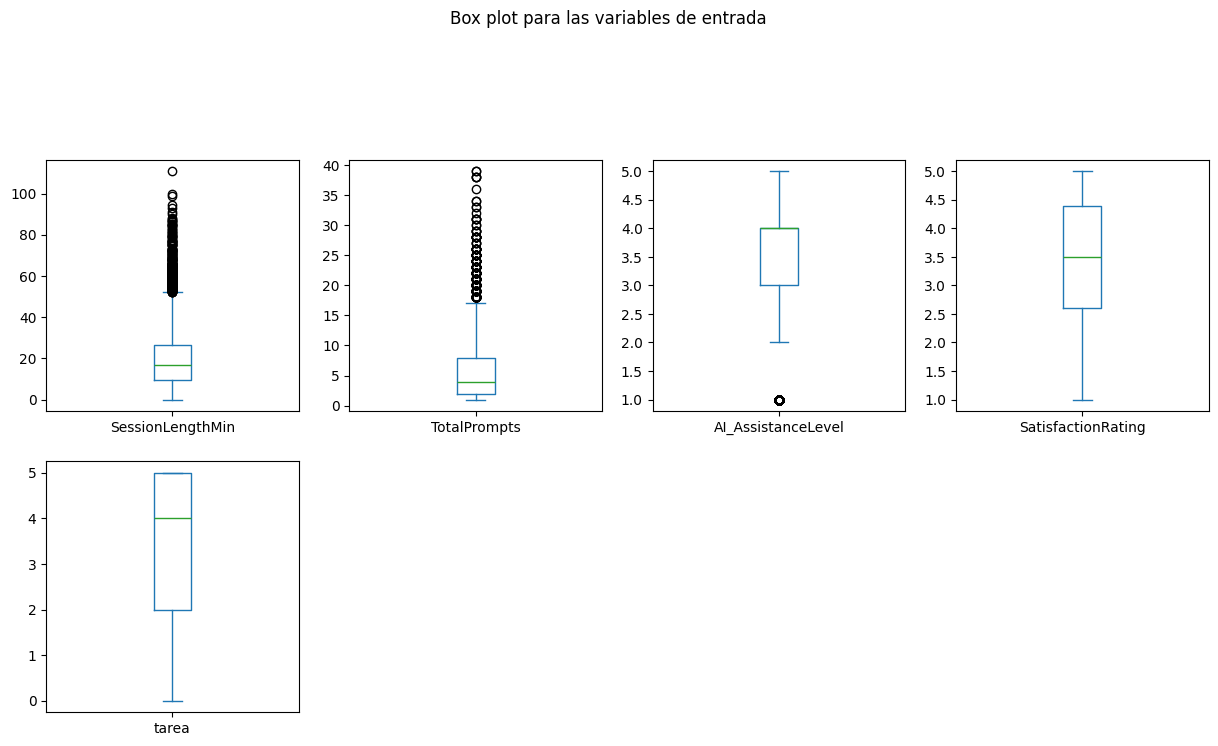

In [ ]:
df.drop('TaskType', axis=1 ).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15), title= 'Box plot para las variables de entrada')
#plt.savefig('TaskType)
plt.show()

()

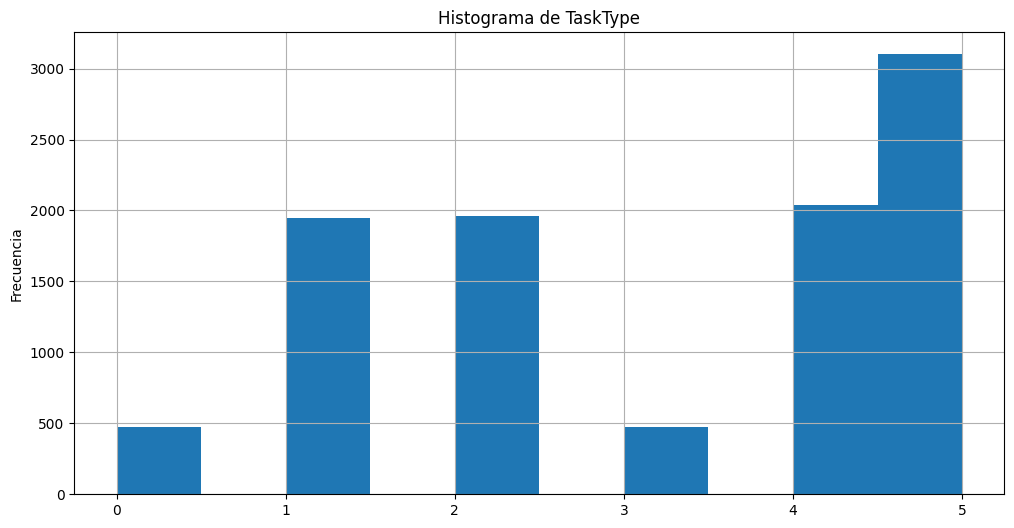

In [ ]:
# Histograma de TaskType
df.tarea.hist()
plt.title('Histograma de TaskType')
plt.ylabel('Frecuencia')
()

In [ ]:

print(f"Skewness: {df['tarea'].skew()}")
print(f"Kurtosis: {df['tarea'].kurt()}")

Skewness: -0.24514067270322412
Kurtosis: -1.433165778256745
